# Modeling citibike data

In [3]:
# %load /Users/Andy/jupyter_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3


### Load the data, which was combined in *citibike_regression_make_data*

In [4]:
df_comb = pd.read_csv('data/data_comb.csv')
df_comb.head()

,N,date,Tmean,precip_In,max_gust_mph,cloud_cover,N_sta,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,public
0,16650,2013-07-01,76,0.73,26.0,8,326,0,0,0,0,0,0,0.0
1,22745,2013-07-02,78,0.06,23.0,7,327,1,0,0,0,0,0,0.0
2,21864,2013-07-03,80,0.96,23.0,7,326,0,1,0,0,0,0,0.0
3,22326,2013-07-04,84,0.00,24.0,4,324,0,0,1,0,0,0,0.0
4,21842,2013-07-05,85,0.00,23.0,1,325,0,0,0,1,0,0,0.0


In [3]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 14 columns):
N               1176 non-null int64
date            1176 non-null object
Tmean           1176 non-null int64
precip_In       1176 non-null float64
max_gust_mph    1173 non-null float64
cloud_cover     1176 non-null int64
N_sta           1176 non-null int64
wkday_1         1176 non-null int64
wkday_2         1176 non-null int64
wkday_3         1176 non-null int64
wkday_4         1176 non-null int64
wkday_5         1176 non-null int64
wkday_6         1176 non-null int64
public          1176 non-null float64
dtypes: float64(3), int64(10), object(1)
memory usage: 128.7+ KB


## split data into predictor/target arrays in prep for modelling

In [4]:
X = df_comb.drop(['date','N'], axis=1)
X.head()

,Tmean,precip_In,max_gust_mph,cloud_cover,N_sta,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,public
0,76,0.73,26.0,8,326,0,0,0,0,0,0,0.0
1,78,0.06,23.0,7,327,1,0,0,0,0,0,0.0
2,80,0.96,23.0,7,326,0,1,0,0,0,0,0.0
3,84,0.00,24.0,4,324,0,0,1,0,0,0,0.0
4,85,0.00,23.0,1,325,0,0,0,1,0,0,0.0


In [5]:
y = df_comb['N']
y.head()

0    16650
1    22745
2    21864
3    22326
4    21842
Name: N, dtype: int64

## Split data into training/test sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=39)

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

#imp = Imputer(strategy='most_frequent')
imp = Imputer(strategy='mean')
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test =imp.transform(X_test)
X_all = imp.transform(X)

reg = LinearRegression()
reg.fit(X_train,y_train)
preds = reg.predict(X_test)
cv_linreg_mean = np.mean(cross_val_score(reg,X_train,y_train))
cv_linreg_mean

0.81804026245744532

In [8]:
# score on training set
reg.score(X_train,y_train)

0.82854673760033681

In [9]:
# score on test set
lin_reg_test_score=reg.score(X_test,y_test)
lin_reg_test_score

0.81356287271583683

In [10]:
from sklearn.metrics import mean_squared_error
RMSE_linreg = mean_squared_error(y_test, reg.predict(X_test))**0.5
RMSE_linreg

5924.6658445643588

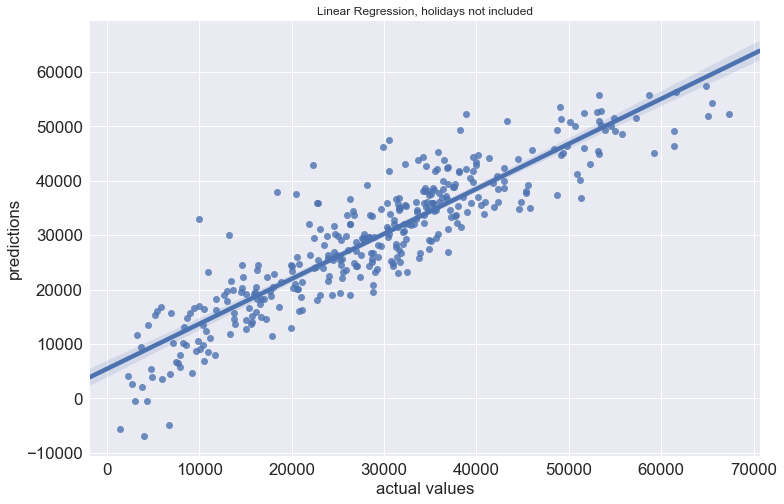

In [11]:
# plot predictions vs actual values
plt.figure(figsize=(12,8))
#plt.scatter(y_test,preds)
sns.regplot(y_test,preds)
plt.xlabel('actual values')
plt.ylabel('predictions');
plt.title('Linear Regression, holidays not included')

In [12]:
# Examine coefficients
coefs = pd.DataFrame({'vars':X.columns,'coef':reg.coef_,'coef_abs':np.abs(reg.coef_)})
coefs.sort_values('coef_abs',ascending=False)

,coef,coef_abs,vars
11,-8117.647142,8117.647142,public
1,-6667.433714,6667.433714,precip_In
10,-6564.006322,6564.006322,wkday_6
9,-5089.485211,5089.485211,wkday_5
6,2322.459956,2322.459956,wkday_2
7,1477.417456,1477.417456,wkday_3
5,1142.608363,1142.608363,wkday_1
3,-1126.084670,1126.084670,cloud_cover
0,518.040942,518.040942,Tmean
8,-135.405420,135.405420,wkday_4


### plot timeseries of actual and predicted values from linear regression

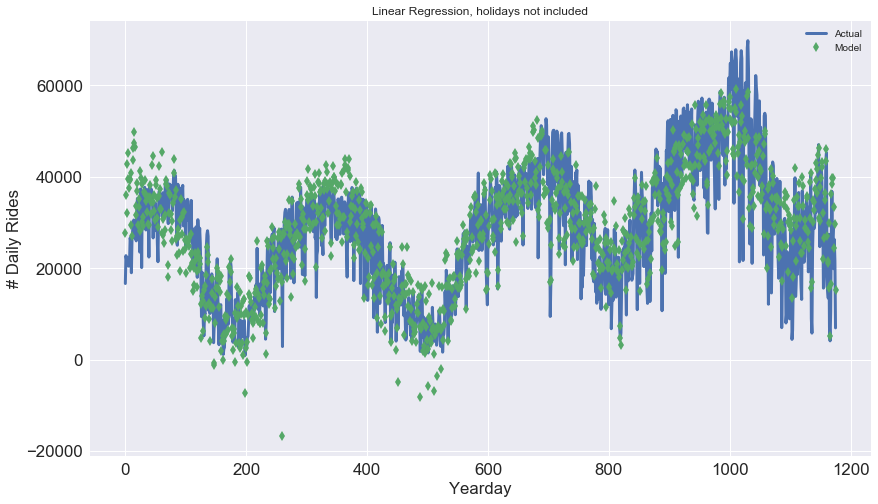

In [13]:
#
plt.figure(figsize=(14,8))
plt.plot(y,label='Actual')
plt.plot(reg.predict(X_all),'d',label='Model')
plt.legend();
plt.xlabel('Yearday')
plt.ylabel('# Daily Rides')
plt.title('Linear Regression, holidays not included')
plt.savefig('figures/reg_vs_actual_timeseries.pdf')

### plot timeseries of residuals

(-25000, 15000)

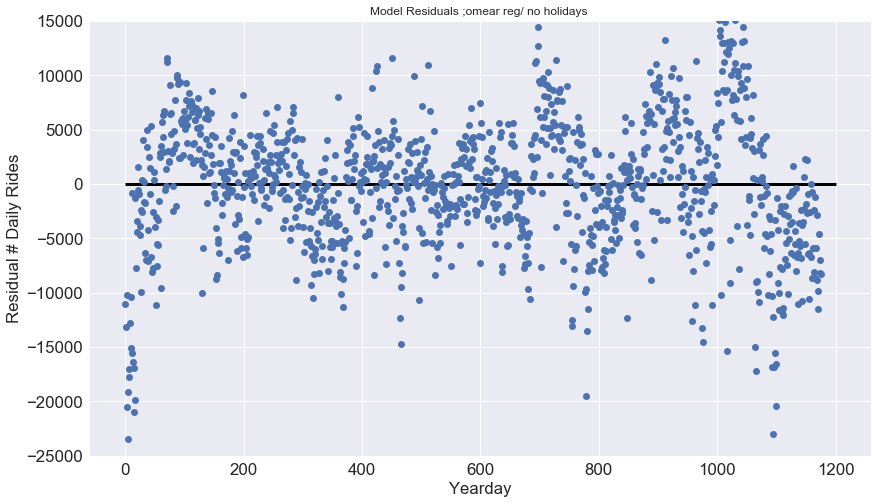

In [14]:
plt.figure(figsize=(14,8))
#plt.plot(y,label='Actual')
plt.plot(y-reg.predict(X_all),'o')
#plt.legend();
plt.xlabel('Yearday')
plt.ylabel('Residual # Daily Rides')
plt.title('Model Residuals ;omear reg/ no holidays ');
plt.hlines(xmin=0,xmax=1200,y=0);
plt.ylim(-25000,15000)

### Random forest regression

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train))

0.86302121552021438

In [16]:
rf.score(X_train, y_train)

0.98164960601710982

In [18]:
RMSE_rf = mean_squared_error(y_test, rf.predict(X_test))**0.5
RMSE_rf

4648.1172922296273

### Random Forest optimized w/ gridsearchCV

In [35]:
# optimize RF
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,150],'min_samples_split':[2,5,10]}
rf2 = RandomForestRegressor()
cv = GridSearchCV(rf2, params)
cv.fit(X_train, y_train)
rf2 = cv.best_estimator_
np.mean( cross_val_score(rf2, X_train, y_train) )

0.8676409596081549

In [36]:
rf2.score(X_test, y_test)

0.88932591546245077

In [39]:
RMSE_rf2= mean_squared_error(y_test, rf2.predict(X_test))**0.5
RMSE_rf2

4564.7881695435672

In [38]:
rf2

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
# Compare RMSE
print('Lin Reg.     : ' + str(RMSE_linreg))
print('Rand Forest  : ' + str(RMSE_rf))
print('Rand Forest opti.  : ' + str(RMSE_rf))


### Plot timeseries of actual and predicted by random forest

(-25000, 20000)

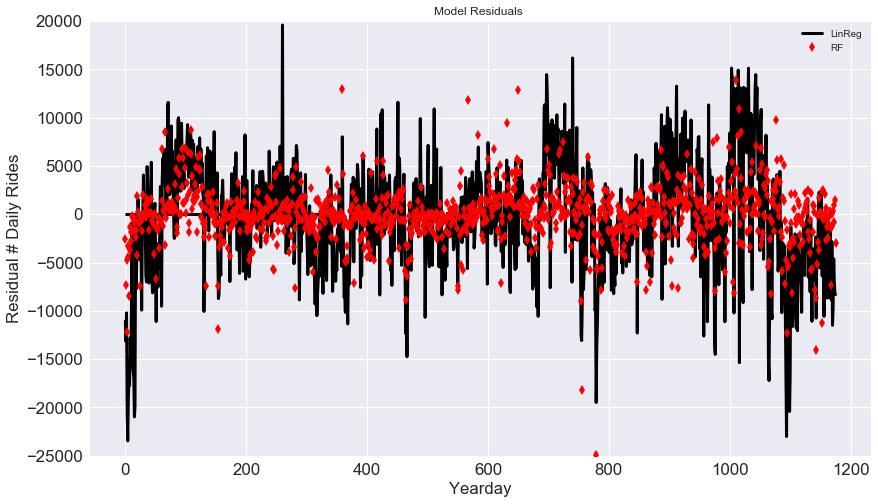

In [19]:
plt.figure(figsize=(14,8))
#plt.plot(y,label='Actual')
plt.plot(y-reg.predict(X_all),'k',label='LinReg')
plt.plot(y-rf.predict(X_all),'rd',label='RF')
plt.legend();
plt.xlabel('Yearday')
plt.ylabel('Residual # Daily Rides')
plt.title('Model Residuals ');
plt.hlines(xmin=0,xmax=360,y=0);
plt.ylim(-25000,20000)

In [20]:
rf_imp = pd.DataFrame({'vars':X.columns,'imp':rf.feature_importances_})
rf_imp.sort_values('imp',ascending=False)

,imp,vars
0,0.530792,Tmean
4,0.291337,N_sta
1,0.078166,precip_In
3,0.041326,cloud_cover
2,0.018929,max_gust_mph
10,0.015642,wkday_6
9,0.008745,wkday_5
6,0.004452,wkday_2
11,0.003397,public
5,0.002939,wkday_1


Lin Reg.     : 5924.66584456
Rand Forest  : 4648.11729223


### Try random forest regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train))

0.85856613191067022

In [23]:
rf.score(X_test,y_test)

0.88382144251594141

In [28]:
# compare scores from different models:
print(np.mean(cross_val_score(reg,X_train,y_train)))
print(np.mean(cross_val_score(rf,X_train,y_train)))

0.818040262457
0.855173750154


In [29]:
print(RMSE_linreg)
print(RMSE_rf)

5924.66584456
4648.11729223


### Look at dates of residuals to see if any are holidays etc:

In [30]:
X2 = df_comb.copy()
# add residuals 
X2['resid'] = y - reg.predict(X_all)
X2.head()

,N,date,Tmean,precip_In,max_gust_mph,cloud_cover,N_sta,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,public,resid
0,16650,2013-07-01,76,0.73,26.0,8,326,0,0,0,0,0,0,0.0,-11064.925045
1,22745,2013-07-02,78,0.06,23.0,7,327,1,0,0,0,0,0,0.0,-13175.309805
2,21864,2013-07-03,80,0.96,23.0,7,326,0,1,0,0,0,0,0.0,-10208.726463
3,22326,2013-07-04,84,0.00,24.0,4,324,0,0,1,0,0,0,0.0,-20503.650893
4,21842,2013-07-05,85,0.00,23.0,1,325,0,0,0,1,0,0,0.0,-23457.483704


In [31]:
X2[['resid','date']].sort_values('resid').head(10)

,resid,date
4,-23457.483704,2013-07-05
1094,-23002.179137,2016-12-25
15,-20979.056450,2013-07-18
3,-20503.650893,2013-07-04
1099,-20413.004310,2017-01-02
16,-19863.673724,2013-07-19
779,-19483.244629,2015-12-24
5,-19107.903351,2013-07-06
7,-17724.623738,2013-07-08
1065,-17219.932118,2016-11-25


In [32]:
X2[['resid','date']].sort_values('resid').tail(10)

,resid,date
912,13251.521710,2016-06-02
1004,13604.826915,2016-09-16
1005,14157.219264,2016-09-17
1043,14443.317593,2016-11-02
697,14449.835545,2015-09-25
1014,14912.695199,2016-09-26
1031,15114.680414,2016-10-20
1003,15120.889805,2016-09-15
740,16168.785091,2015-11-11
260,19579.541596,2014-04-30


Below we can see that some of the largest residuals occurred on or near holidays (Thanksgiving, Christmas etc.). So we should probably include holidays as a predictor.

In [33]:
# plot residuals and holidays
#plt.figure(figsize=(14,8))
#plt.plot(X.date,X.resid,'o')
##ax=plt.gca()
#plt.axvline?
#plt.vlines(x=df_holi.loc[:,'observed'].values,ymin=-25000,ymax=15000)
#plt.xlabel('Yearday ' )
#plt.ylabel('Model Residual')
#plt.title('Model Residual (not including holidays) w/ Holidays Marked')
#plt.savefig('figures/2016_linreg_resids_holi_timeseries.pdf')

### It looks like a lot of the big residueals occur a day or two before/after holidays; maybe try making a 'near holiday' variable?
- example: 2 days before/after Thanksgiving
- last days of December (people likely take long weekend before New years
- Xmas in 2016 was 'observed' on the 26th. Need to modify holiday df to include both actual and observed dates for holidays?

### Try random forest regressor
- Maybe random forest will bettter capture the holiday? Doesn't really make sense that holiday would be well-represented by a linear model?

In [34]:
# plot residuals for Linear regression and RF
plt.figure(figsize=(14,8))
#plt.plot(y,label='Actual')
plt.plot(y-reg.predict(X),label='LinReg')
plt.plot(y-rf2.predict(X),'d',label='RFreg')
plt.legend();
plt.xlabel('Yearday')
plt.ylabel('Residual # Daily Rides')
plt.title('Model Residuals ');
plt.hlines(xmin=0,xmax=360,y=0);
plt.ylim(-30000,15000)
#plt.savefig('figures/2016_resids_lin_rf_timeseries.pdf')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Random forest regressor seems to be better